<a href="https://colab.research.google.com/github/Utkarshmishra2k2/Crop-Analysis/blob/main/Agriculture_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Library

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Data Profiling

In [3]:
data_01 = pd.read_csv ("https://raw.githubusercontent.com/UM1412/Data-Set/main/Agriculter%20Data%20Set.csv")

In [4]:
data_01.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data_01.shape

(2200, 8)

In [6]:
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data_01.describe ( include = "all" ).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
N,2200.0,NaN,NaN,NaN,50.551818,36.917334,0.0,21.0,37.0,84.25,140.0
P,2200.0,NaN,NaN,NaN,53.362727,32.985883,5.0,28.0,51.0,68.0,145.0
K,2200.0,NaN,NaN,NaN,48.149091,50.647931,5.0,20.0,32.0,49.0,205.0
temperature,2200.0,NaN,NaN,NaN,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,NaN,NaN,NaN,71.481779,22.263812,14.25804,60.261953,80.473146,89.948771,99.981876
ph,2200.0,NaN,NaN,NaN,6.46948,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,NaN,NaN,NaN,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117
label,2200,22,rice,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_01.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
data_01 ["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
data_01 ["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

#Exploratory Analysis

In [11]:
print( "Mean of Nitrogen in Farm : {}".format( data_01["N"].mean() ) )
print( "Mean of Phosphorus in Farm : {}".format( data_01["P"].mean() ) )
print( "Mean of Potassium in Farm : {}".format( data_01["K"].mean() ) )
print( "Median of Temperature in Farm : {}".format( data_01["temperature"].median() ) )
print( "Median of Humidity in Farm : {}".format( data_01["humidity"].median() ) )
print( "Mean of PH Value in Farm : {}".format( data_01["ph"].mean() ) )

Mean of Nitrogen in Farm : 50.551818181818184
Mean of Phosphorus in Farm : 53.36272727272727
Mean of Potassium in Farm : 48.14909090909091
Median of Temperature in Farm : 25.5986932
Median of Humidity in Farm : 80.473145665
Mean of PH Value in Farm : 6.469480065256364


In [12]:
(pd.pivot_table(data_01,index=['label'],aggfunc='mean')).T

label,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
K,199.890000,50.050000,19.240000,79.920000,30.590000,29.940000,19.560000,200.110000,39.990000,20.050000,...,29.920000,20.230000,19.870000,50.080000,10.010000,50.040000,20.290000,40.210000,39.870000,50.220000
N,20.800000,100.230000,40.020000,40.090000,21.980000,101.200000,117.770000,23.180000,78.400000,20.750000,...,20.070000,21.440000,20.990000,100.320000,19.580000,49.880000,20.730000,18.870000,79.890000,99.420000
P,134.220000,82.010000,67.470000,67.790000,16.930000,28.740000,46.240000,132.530000,46.860000,67.540000,...,27.180000,48.010000,47.280000,17.720000,16.550000,59.050000,67.730000,18.750000,47.580000,17.000000
humidity,92.333383,80.358123,65.118426,16.860439,94.844272,58.869846,79.843474,81.875228,79.639864,21.605357,...,50.156573,53.160418,85.499975,92.342802,92.170209,92.403388,48.061633,90.125504,82.272822,85.160375
ph,5.929663,5.983893,7.133952,7.336957,5.976562,6.790308,6.912675,6.025937,6.732778,5.749411,...,5.766373,6.831174,6.723957,6.358805,7.016957,6.741442,5.794175,6.429172,6.425471,6.495778
rainfall,112.654779,104.626980,67.884151,80.058977,175.686646,158.066295,80.398043,69.611829,174.792798,105.919778,...,94.704515,51.198487,48.403601,24.689952,110.474969,142.627839,149.457564,107.528442,236.181114,50.786219
temperature,22.630942,27.376798,29.973340,18.872847,27.409892,25.540477,23.988958,23.849575,24.958376,20.115085,...,31.208770,28.194920,28.525775,28.663066,22.765725,33.723859,27.741762,21.837842,23.689332,25.591767


In [13]:
data_04 = (pd.pivot_table(data_01,index=['label'],aggfunc='mean')).reset_index()

##For Nitrogen

In [14]:
fig_01 = px.histogram(data_01,x="N",marginal='box',nbins=47,title="Nitrogen Distribution",text_auto=True)
fig_01.update_layout(bargap=0.1)
fig_01.show()

In [15]:
plt.figure(figsize=(50, 40))
fig = px.pie(data_01, values="N", names='label', color_discrete_sequence=px.colors.sequential.RdBu, title="Nitogen Composition in Crop")
fig.show()

<Figure size 3600x2880 with 0 Axes>

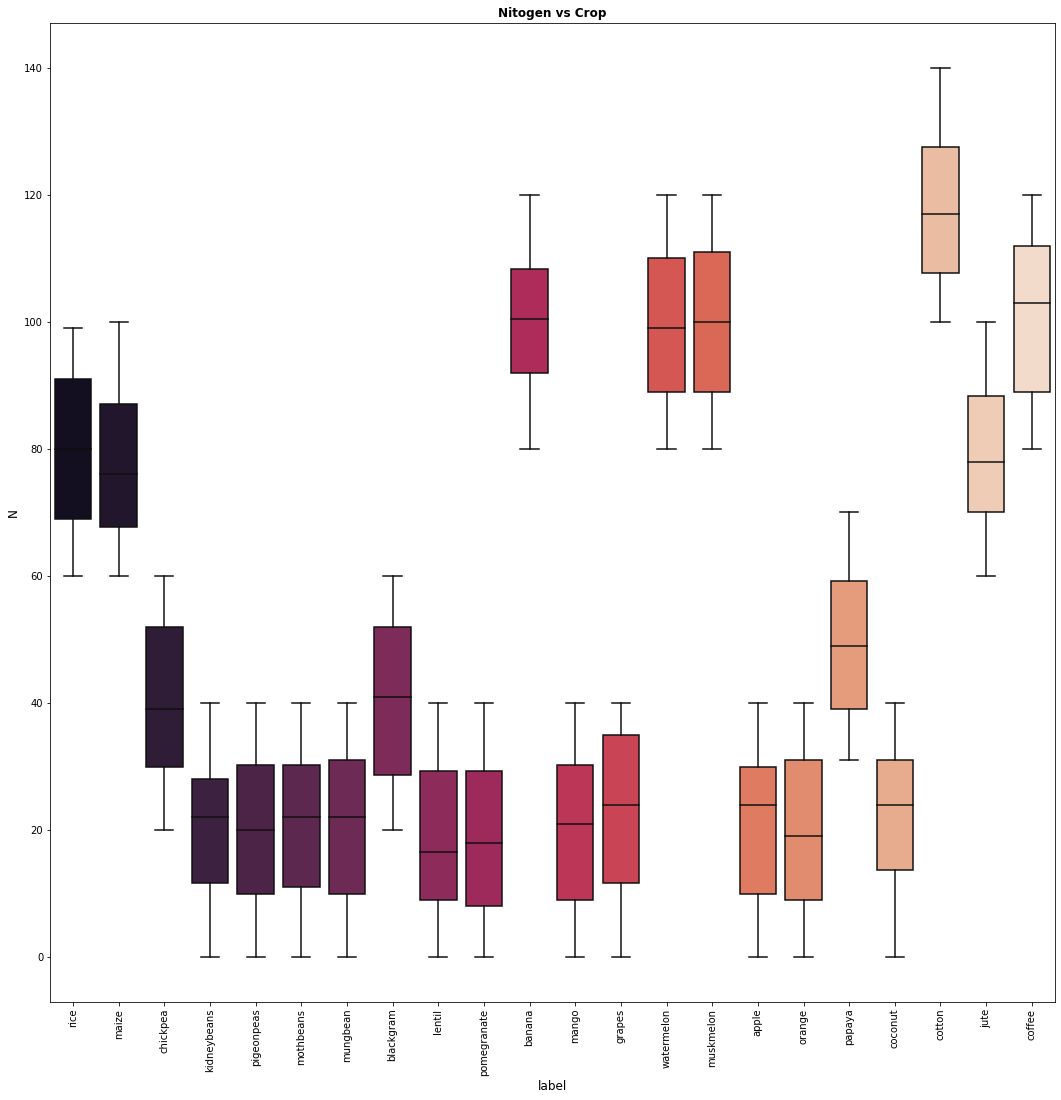

In [16]:
plt.figure(figsize = (18,18))
sns.boxplot(x = "label", y = "N", data = data_01, palette = 'rocket')
plt.xlabel('label', fontsize = 12)
plt.ylabel("N", fontsize = 12)
plt.xticks(rotation=90)
plt.title("Nitogen vs Crop", fontweight='bold')
plt.show()

In [17]:
fig_01 = px.histogram(data_04,x="label",y="N",marginal='box',nbins=47,title="Nitogen Vs Crop",text_auto=True)
fig_01.update_layout(bargap=0.1)
fig_01.show()

##Phosphorus

In [18]:
fig_01 = px.histogram(data_01,x="P",marginal='box',nbins=47,title="Phosphorus Distribution",text_auto=True)
fig_01.update_layout(bargap=0.1)
fig_01.show()

In [19]:
plt.figure(figsize=(50, 40))
fig = px.pie(data_01, values="P", names='label', color_discrete_sequence=px.colors.sequential.RdBu, title="Phosphorus Composition in Crop")
fig.show()

<Figure size 3600x2880 with 0 Axes>

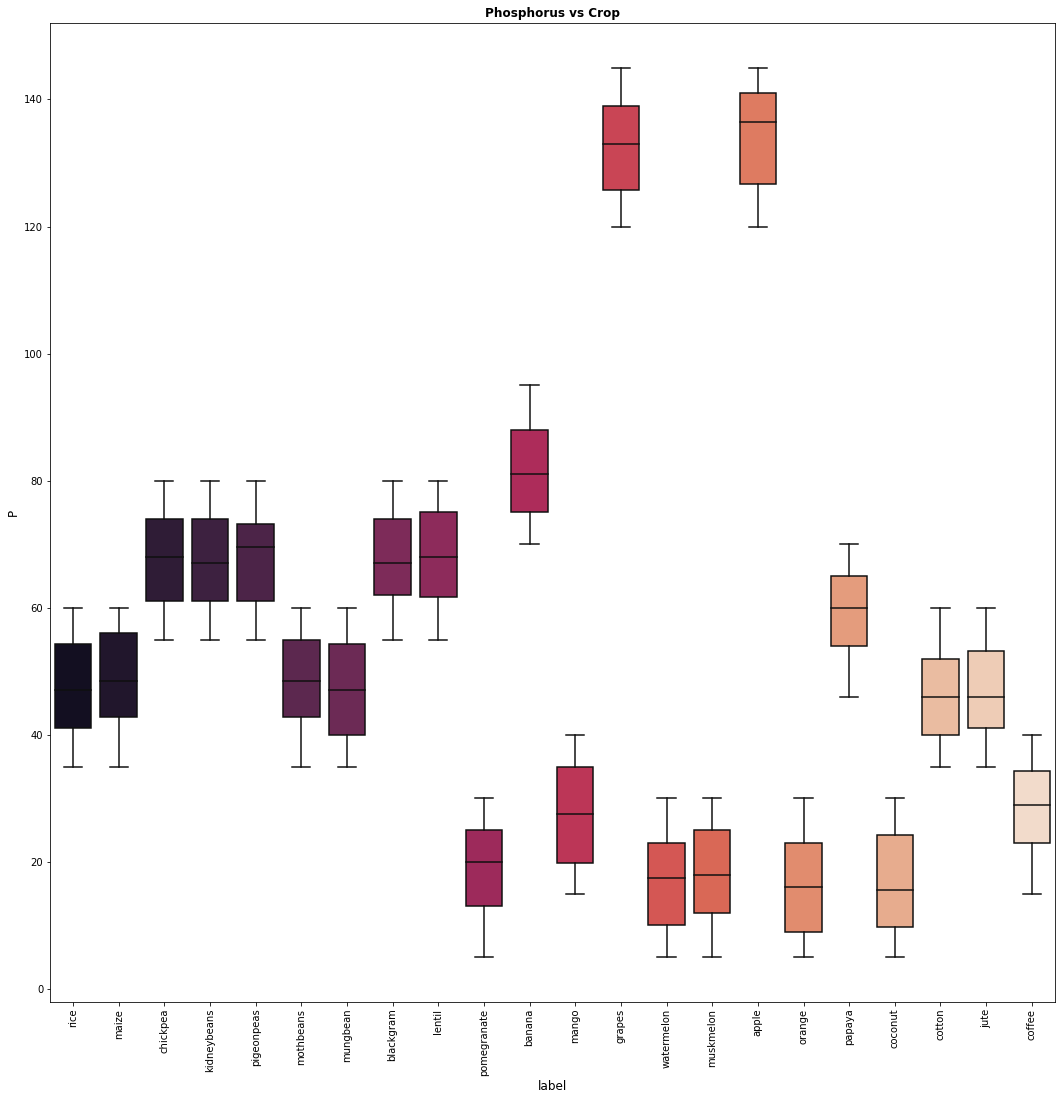

In [20]:
plt.figure(figsize = (18,18))
sns.boxplot(x = "label", y = "P", data = data_01, palette = 'rocket')
plt.xlabel('label', fontsize = 12)
plt.ylabel("P", fontsize = 12)
plt.xticks(rotation=90)
plt.title("Phosphorus vs Crop", fontweight='bold')
plt.show()

In [21]:
fig_01 = px.histogram(data_04,x="label",y="P",marginal='box',nbins=47,title="Phosphorus Vs Crop",text_auto=True)
fig_01.update_layout(bargap=0.1)
fig_01.show()

##For Potassium

In [22]:
fig_01 = px.histogram(data_01,x="K",marginal='box',nbins=47,title="Potassium Distribution",text_auto=True)
fig_01.update_layout(bargap=0.1)
fig_01.show()

In [23]:
plt.figure(figsize=(50, 40))
fig = px.pie(data_01, values="K", names='label', color_discrete_sequence=px.colors.sequential.RdBu, title="Potassium Composition in Crop")
fig.show()

<Figure size 3600x2880 with 0 Axes>

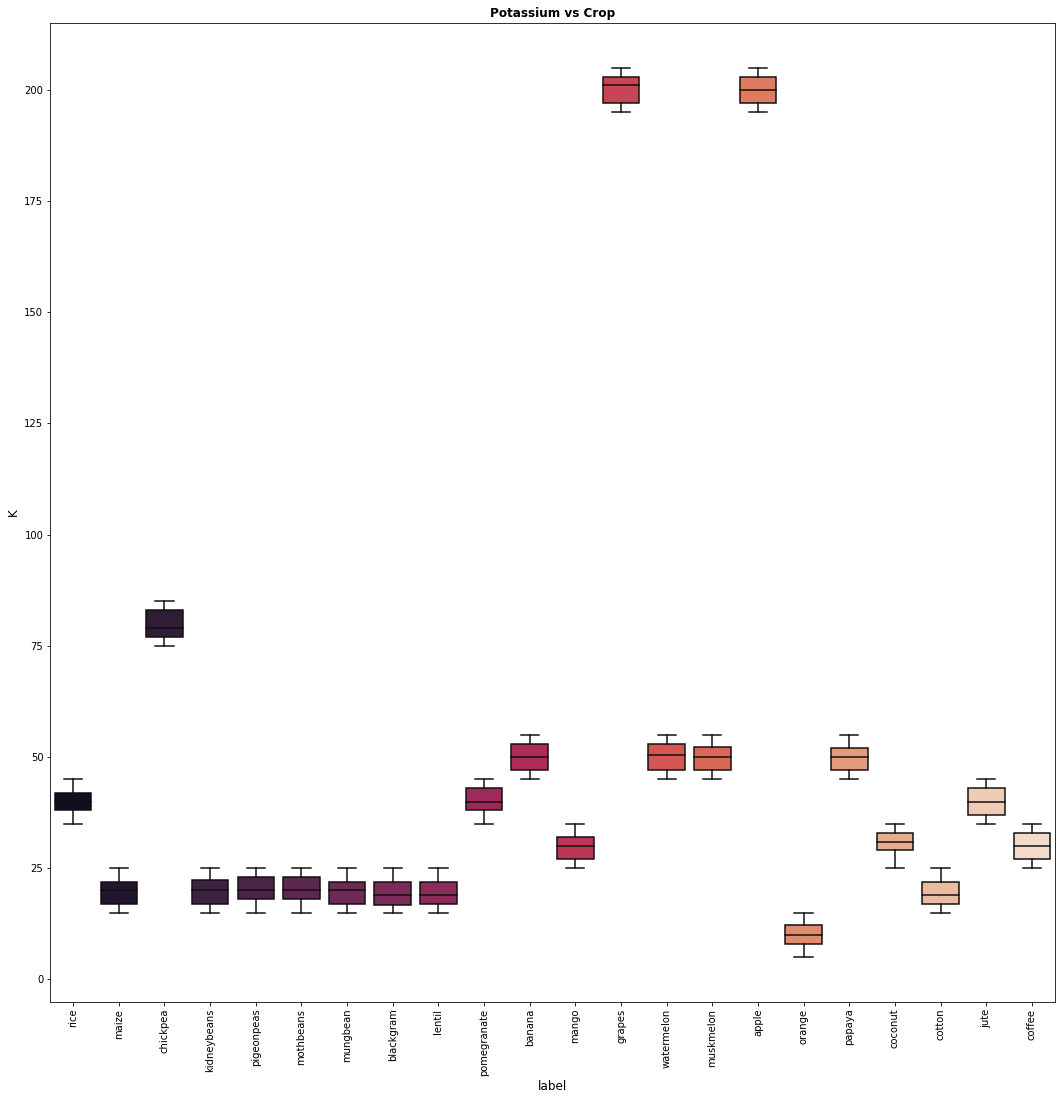

In [24]:
plt.figure(figsize = (18,18))
sns.boxplot(x = "label", y = "K", data = data_01, palette = 'rocket')
plt.xlabel('label', fontsize = 12)
plt.ylabel("K", fontsize = 12)
plt.xticks(rotation=90)
plt.title("Potassium vs Crop", fontweight='bold')
plt.show()

In [25]:
fig_01 = px.histogram(data_04,x="label",y="K",marginal='box',nbins=47,title="Potassium Vs Crop",text_auto=True)
fig_01.update_layout(bargap=0.1)
fig_01.show()

##For Temperature

In [26]:
fig_01 = px.histogram(data_01,x="temperature",marginal='box',nbins=47,title="Temperature Distribution",text_auto=True)
fig_01.update_layout(bargap=0.1)
fig_01.show()

In [27]:
plt.figure(figsize=(50, 40))
fig = px.pie(data_01, values="temperature", names='label', color_discrete_sequence=px.colors.sequential.RdBu, title="Temperature Composition in Crop")
fig.show()

<Figure size 3600x2880 with 0 Axes>

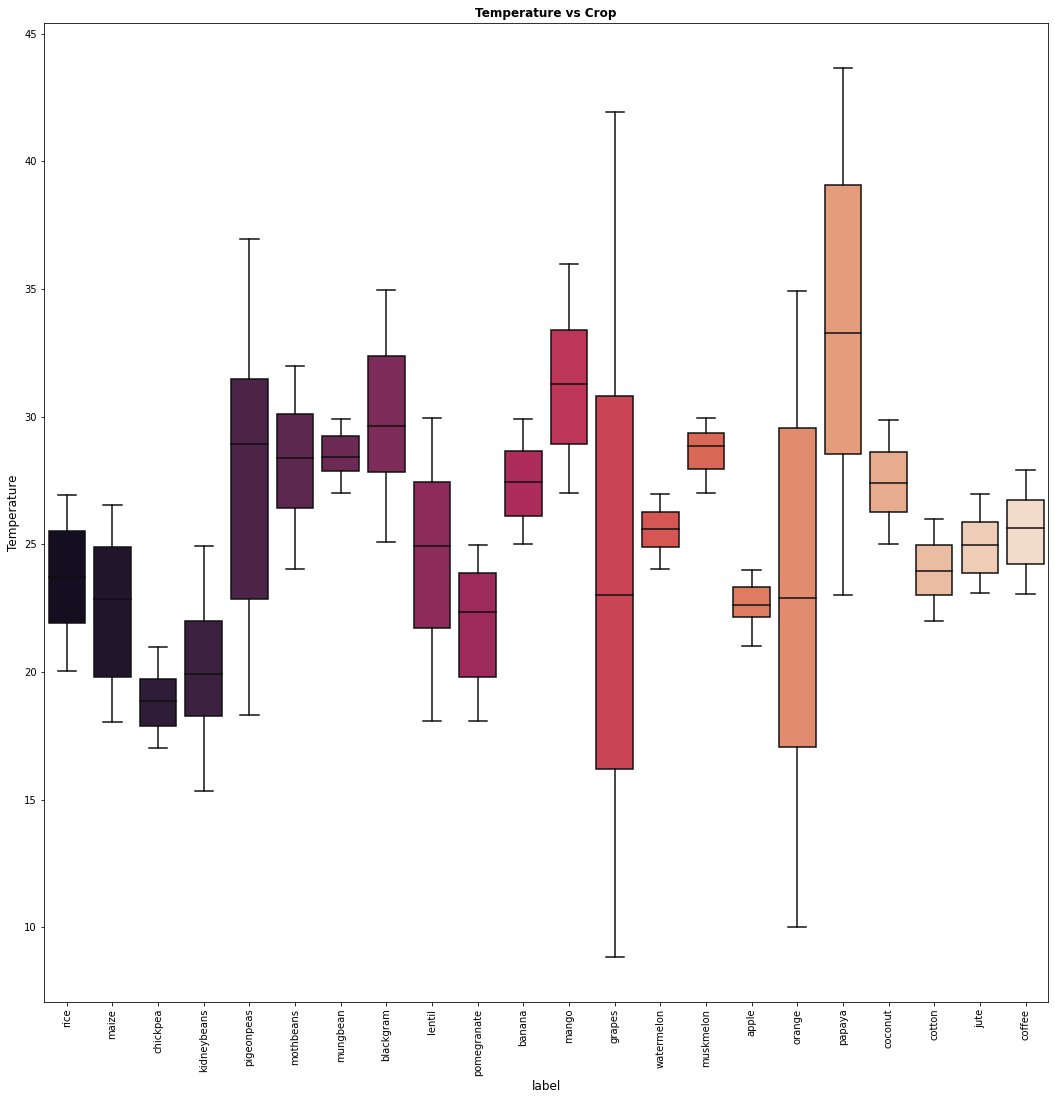

In [28]:
plt.figure(figsize = (18,18))
sns.boxplot(x = "label", y = "temperature", data = data_01, palette = 'rocket')
plt.xlabel('label', fontsize = 12)
plt.ylabel("Temperature", fontsize = 12)
plt.xticks(rotation=90)
plt.title("Temperature vs Crop", fontweight='bold')
plt.show()

In [29]:
fig_01 = px.histogram(data_04,x="label",y="temperature",marginal='box',nbins=47,title="Temperature Vs Crop",text_auto=True)
fig_01.update_layout(bargap=0.1)
fig_01.show()

##For Humidity

In [30]:
fig_01 = px.histogram(data_01,x="humidity",marginal='box',nbins=47,title="Humidity Distribution",text_auto=True)
fig_01.update_layout(bargap=0.1)
fig_01.show()

In [31]:
plt.figure(figsize=(50, 40))
fig = px.pie(data_01, values="humidity", names='label', color_discrete_sequence=px.colors.sequential.RdBu, title="Humidity Composition in Crop")
fig.show()

<Figure size 3600x2880 with 0 Axes>

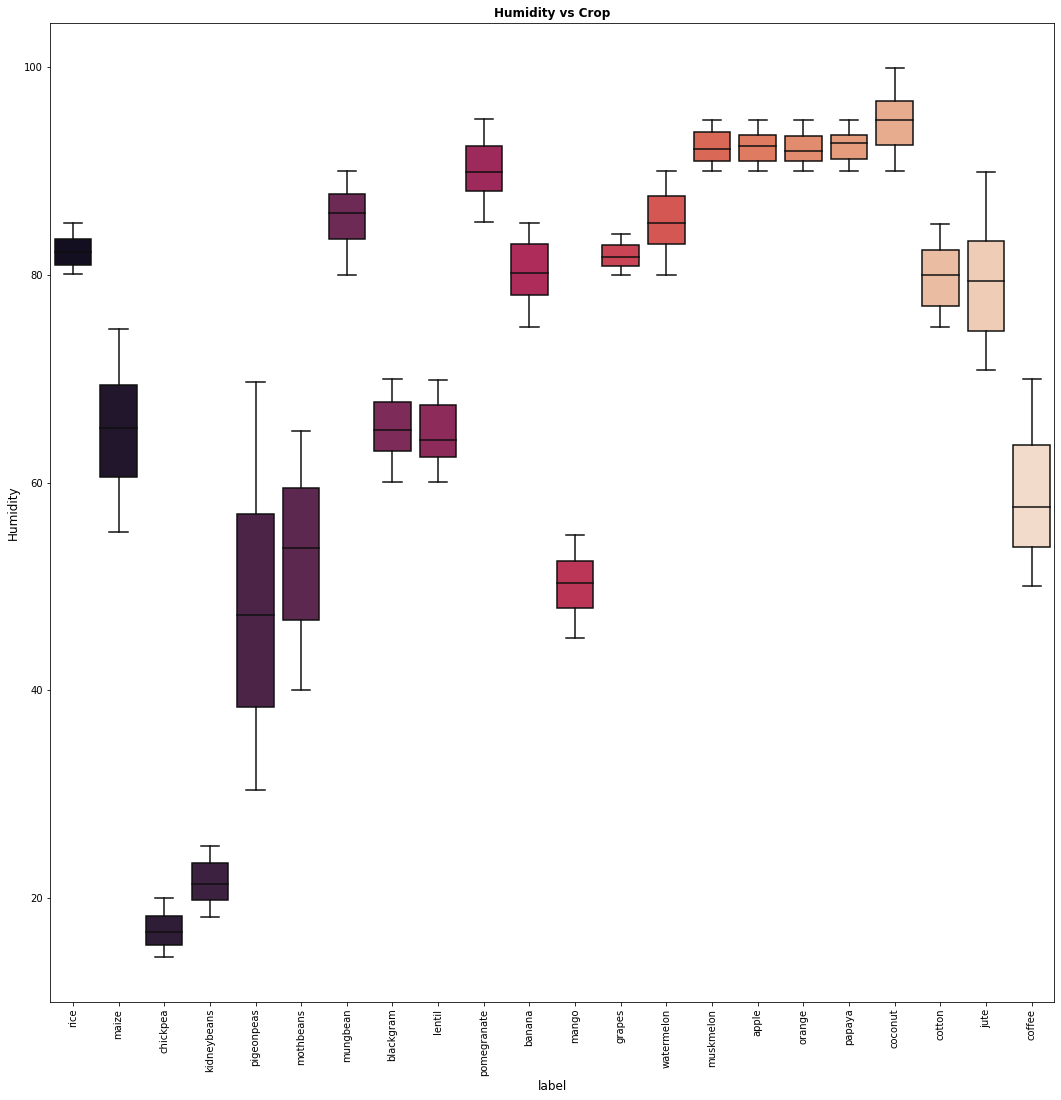

In [32]:
plt.figure(figsize = (18,18))
sns.boxplot(x = "label", y = "humidity", data = data_01, palette = 'rocket')
plt.xlabel('label', fontsize = 12)
plt.ylabel("Humidity", fontsize = 12)
plt.xticks(rotation=90)
plt.title("Humidity vs Crop", fontweight='bold')
plt.show()

In [33]:
fig_01 = px.histogram(data_04,x="label",y="humidity",marginal='box',nbins=47,title="Humidity Vs Crop",text_auto=True)
fig_01.update_layout(bargap=0.1)
fig_01.show()

##For PH

In [34]:
fig_01 = px.histogram(data_01,x="ph",marginal='box',nbins=47,title="PH Distribution",text_auto=True)
fig_01.update_layout(bargap=0.1)
fig_01.show()

In [35]:
plt.figure(figsize=(50, 40))
fig = px.pie(data_01, values="ph", names='label', color_discrete_sequence=px.colors.sequential.RdBu, title="PH Value Composition in Crop")
fig.show()

<Figure size 3600x2880 with 0 Axes>

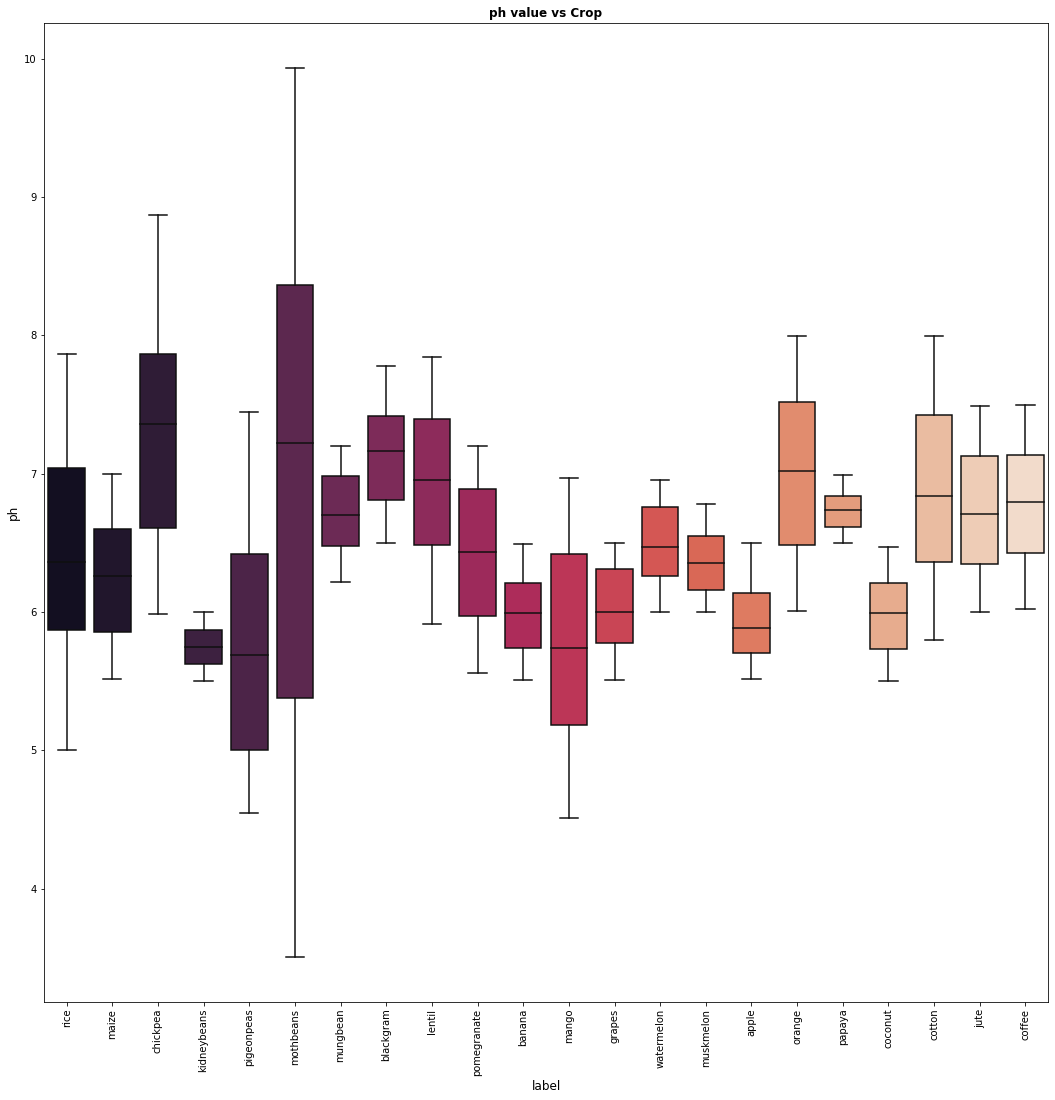

In [36]:
plt.figure(figsize = (18,18))
sns.boxplot(x = "label", y = "ph", data = data_01, palette = 'rocket')
plt.xlabel('label', fontsize = 12)
plt.ylabel("ph", fontsize = 12)
plt.xticks(rotation=90)
plt.title("ph value vs Crop", fontweight='bold')
plt.show()

In [37]:
fig_01 = px.histogram(data_04,x="label",y="ph",marginal='box',nbins=47,title="PH Vs Crop",text_auto=True)
fig_01.update_layout(bargap=0.1)
fig_01.show()

##For Rainfall

In [38]:
fig_01 = px.histogram(data_01,x="rainfall",marginal='box',nbins=47,title="Crop Distribution",text_auto=True)
fig_01.update_layout(bargap=0.1)
fig_01.show()

In [39]:
plt.figure(figsize=(50, 40))
fig = px.pie(data_01, values="rainfall", names='label', color_discrete_sequence=px.colors.sequential.RdBu, title="Rainfall Composition in Crop")
fig.show()

<Figure size 3600x2880 with 0 Axes>

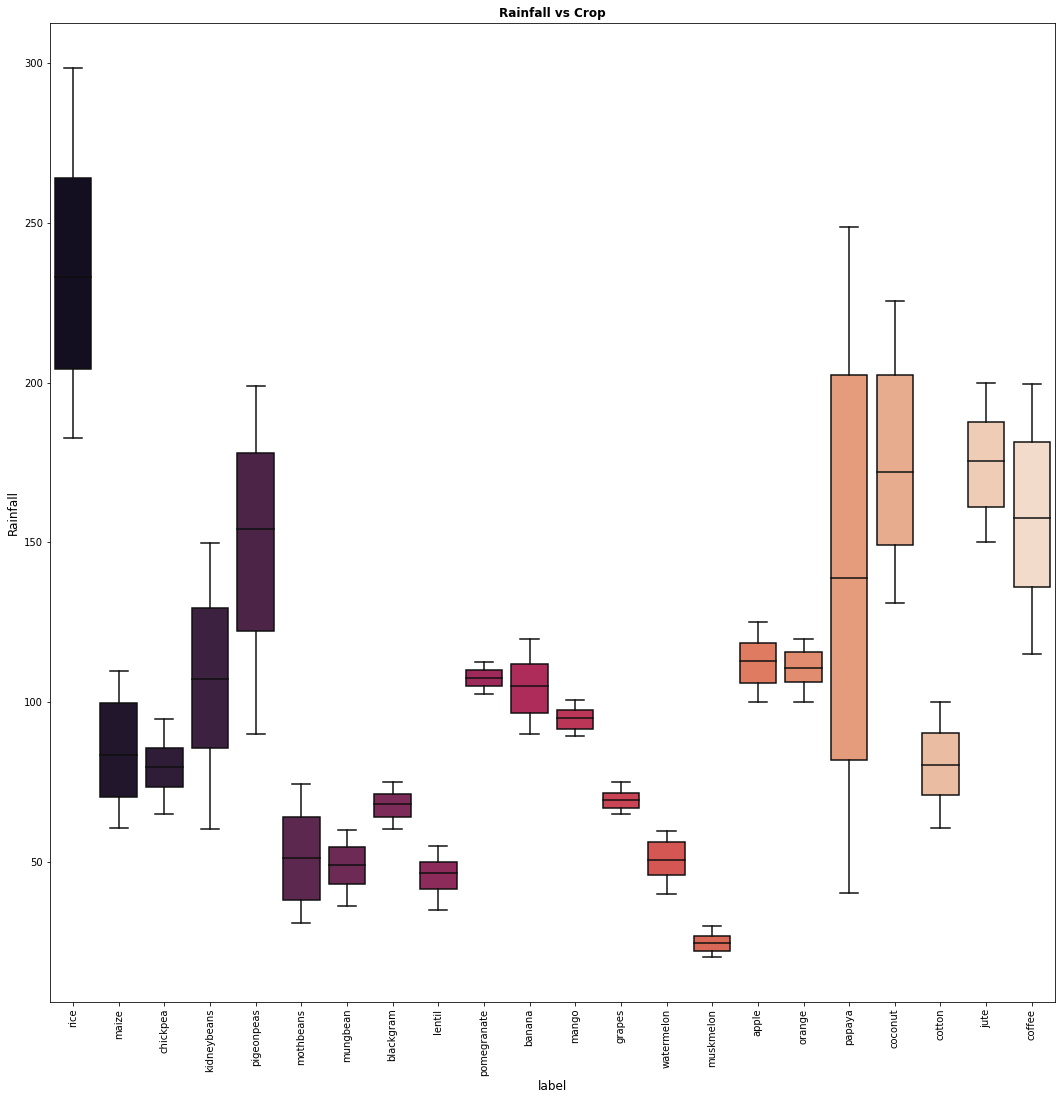

In [40]:
plt.figure(figsize = (18,18))
sns.boxplot(x = "label", y = "rainfall", data = data_01, palette = 'rocket')
plt.xlabel('label', fontsize = 12)
plt.ylabel("Rainfall", fontsize = 12)
plt.xticks(rotation=90)
plt.title("Rainfall vs Crop", fontweight='bold')
plt.show()

In [41]:
fig_01 = px.histogram(data_04,x="label",y="rainfall",marginal='box',nbins=47,title="Rainfall Vs Crop",text_auto=True)
fig_01.update_layout(bargap=0.1)
fig_01.show()

##For Crop

In [42]:
fig_01 = px.histogram(data_01,x="label",marginal='box',nbins=47,title="Crop Distribution",text_auto=True)
fig_01.update_layout(bargap=0.1)
fig_01.show()

##Multivariate Analysis{High Defination}

<Figure size 1296x1296 with 0 Axes>

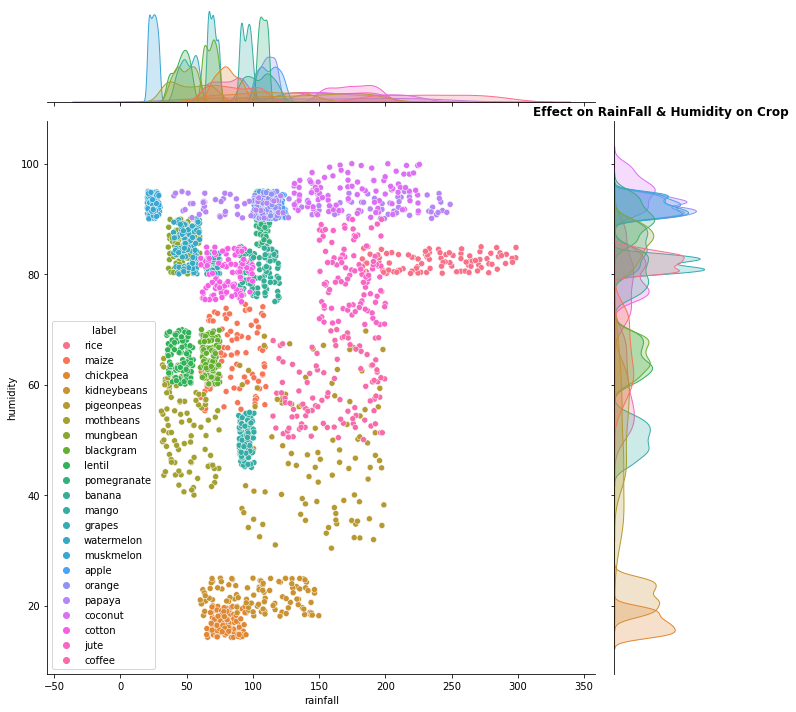

In [43]:
plt.figure(figsize = (18,18))
sns.jointplot(x="rainfall",y="humidity",data=data_01,height=10,hue="label")
plt.title("Effect on RainFall & Humidity on Crop", fontweight='bold')
plt.show()

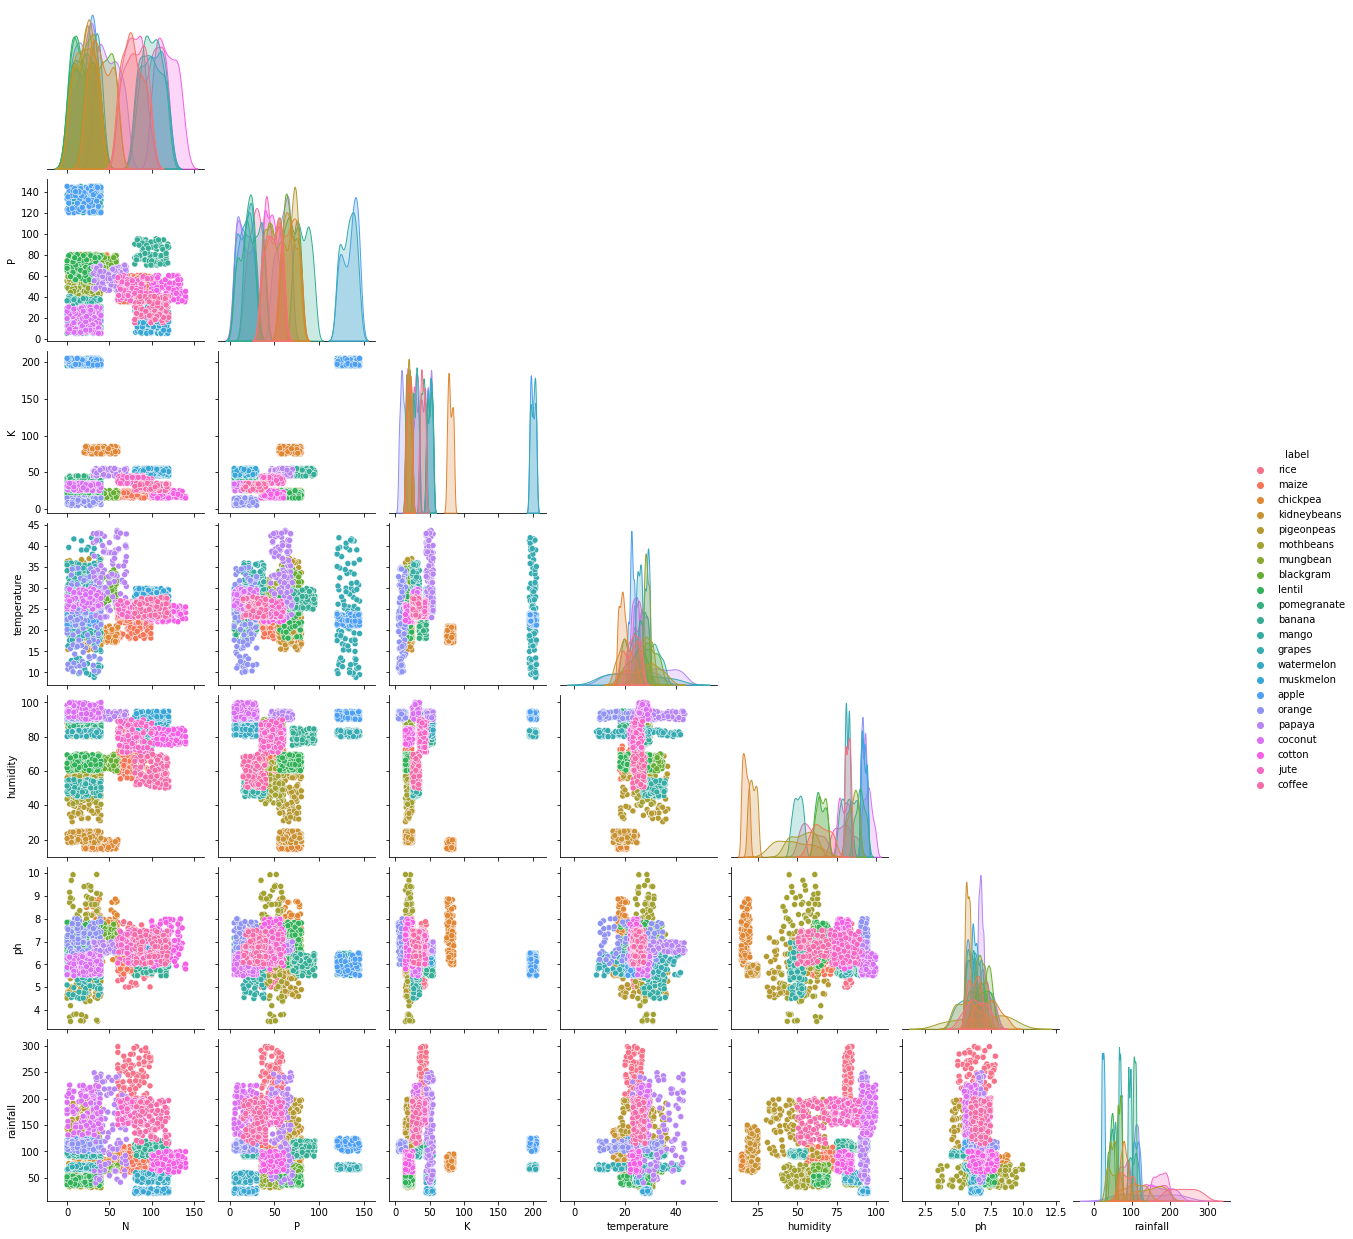

In [44]:
sns.pairplot(data_01 , hue = "label",corner=True);

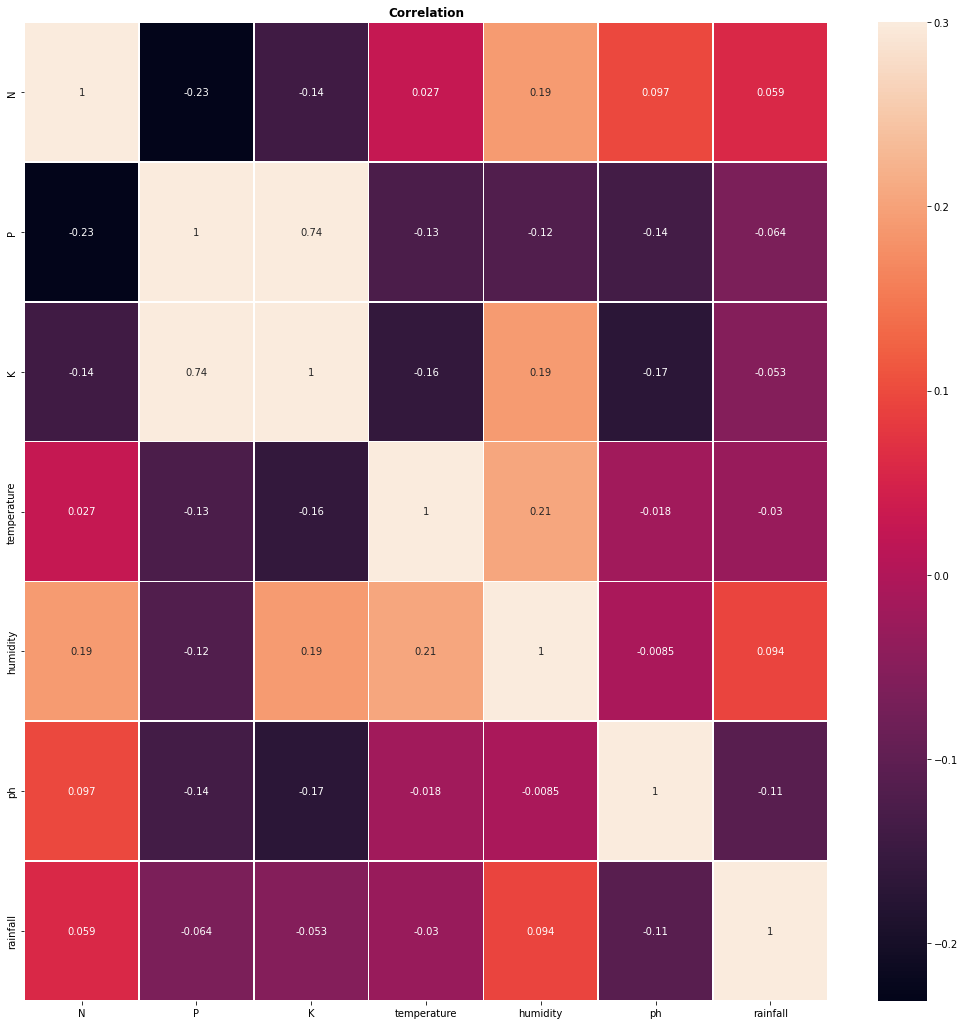

In [45]:
plt.figure(figsize = (18,18))
sns.heatmap( data_01.corr(),vmax=.3,linewidths=.5,annot=True )
plt.title("Correlation", fontweight='bold')
plt.show()

In [46]:
data_02 = data_01
data_03 = pd.DataFrame ({"label":data_02["label"].unique()})
data_03["dummy"] = data_03.index
data_02 = pd.merge(data_02,data_03,on="label",how="left")

In [47]:
dime = list([dict(range=[0,data_02['dummy'].max()], tickvals = data_02['dummy'], ticktext = data_02['label'], label='Crops', values=data_02['dummy']),
             dict(range=[data_02['N'].min(), data_02['N'].max()], label='N', values=data_02['N']),
             dict(range=[data_02['P'].min(), data_02['P'].max()], label='P', values=data_02['P']),
             dict(range=[data_02['K'].min(), data_02['K'].max()], label='K', values=data_02['K']),
             dict(range=[data_02['temperature'].min(), data_02['temperature'].max()], label='Temperature', values=data_02['temperature']),
             dict(range=[data_02['humidity'].min(), data_02['humidity'].max()], label='Humidity', values=data_02['humidity']),
             dict(range=[data_02['ph'].min(),data_02['ph'].max()], label='pH', values=data_02['ph']),
             dict(range=[data_02['rainfall'].min(),data_02['rainfall'].max()], label='Rainfall', values=data_02['rainfall'])])


In [48]:
fig_01 = go.Figure(data=go.Parcoords(line = dict(color = data_02['dummy'], colorscale = 'magma'), dimensions=dime))
fig_01.update_layout(height = 550, width = 1000, title='Crop Feature Distribution', title_font_size=20, title_x=0.5, title_y=0.95)
fig_01.show()

#Regression 

##Declaring Variable

In [49]:
X = data_01.drop('label', axis=1)
y = data_01['label']

##Spliting Data Set

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 0)

##Model Building

In [51]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

##Prediction 

In [52]:
y_pred=model.predict(X_test)

##Accuracy Check

In [53]:
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9833


In [54]:
y_pred_train = model.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


##Overfitting Check

In [55]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9833


##Confusion Matrix

In [56]:
cm = confusion_matrix(y_test, y_pred)

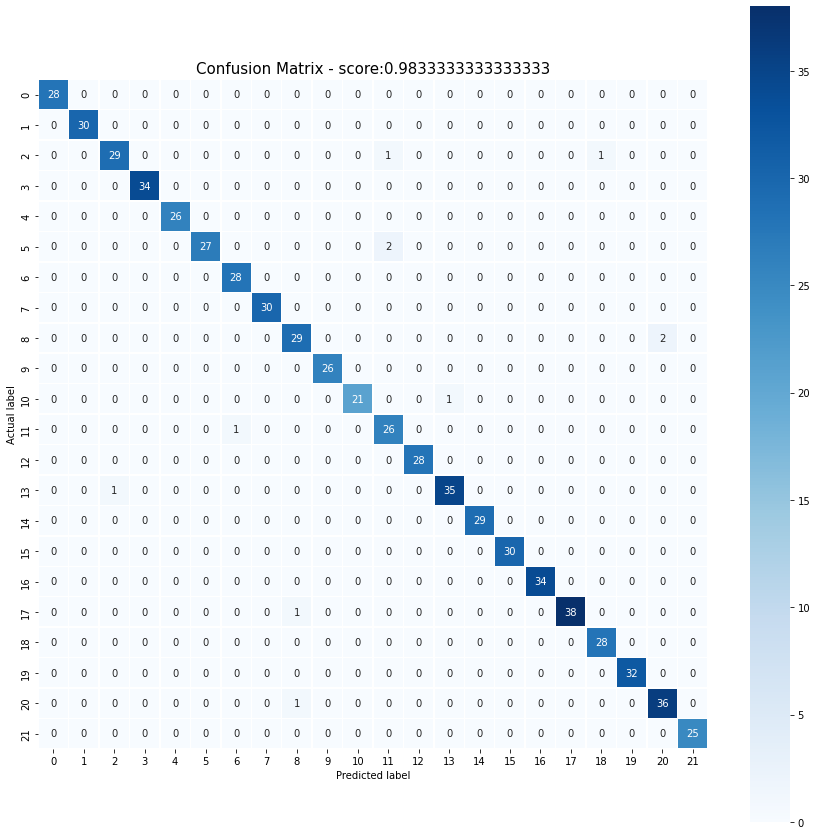

In [57]:
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

##Classification

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.94      0.95        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      0.93      0.96        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.94      0.94      0.94        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      0.95      0.98        22
       maize       0.90      0.96      0.93        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.97      0.97      0.97        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    